In [136]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
data = pd.read_csv("/Users/Sundipta/Desktop/171127/alljoincal.csv")

In [78]:
data.tail()

,(ms),Null,a2 t,a3 t,a4 t
289,17701671,8385.122909,4300.337633,11309.53868,6582.233625
290,17761791,8365.908624,4271.532869,11308.99509,6568.055209
291,17821906,8381.223428,4313.802914,11335.05684,6611.630069
292,17882021,8379.659426,4298.405496,11306.23704,6586.020977
293,17942145,8378.078433,4295.281257,11335.11226,6608.902174


In [79]:
data["(ms)"] = data["(ms)"]/(60*60*1000)

In [80]:
data["a2 t"] = data["a2 t"] - min(data["a2 t"])
data["a3 t"] = data["a3 t"] - min(data["a3 t"])
data["a4 t"] = data["a4 t"] - min(data["a4 t"])
data.head()

,(ms),Null,a2 t,a3 t,a4 t
0,0.000000,9224.394331,37.263932,1151.980852,226.338204
1,0.016705,9325.782541,17.251206,1122.187255,115.641764
2,0.033410,9196.566674,4.403621,1115.657433,33.830821
3,0.050115,9210.511391,5.010672,1050.595172,0.000000
4,0.066820,9164.579767,0.000000,1020.511945,10.252736


In [81]:
x2 = data['(ms)']
y20 = data['a2 t']
y21 = data['a3 t']
y22 = data['a4 t']

In [82]:
data_array = [y20,y21,y22]
#data_array = [y21,y22]

In [83]:
de = {'time':x2,'ILN05': data['a2 t'], 'ILN04': data['a3 t'], 'ILN03': data['a4 t']}
#de = {'time':x2, 'tx3': data['tx3'], 'tx4': data['tx4']}
smooth_df = pd.DataFrame(data = de)
smooth_df.head()

,ILN03,ILN04,ILN05,time
0,226.338204,1151.980852,37.263932,0.000000
1,115.641764,1122.187255,17.251206,0.016705
2,33.830821,1115.657433,4.403621,0.033410
3,0.000000,1050.595172,5.010672,0.050115
4,10.252736,1020.511945,0.000000,0.066820


In [84]:
smooth_df = smooth_df[smooth_df['time']>0.5]

In [85]:
smooth_df['time'] = smooth_df['time'] - min(smooth_df['time'])

In [86]:
smooth_df['ILN03'] = smooth_df['ILN03'] - min(smooth_df['ILN03'])
smooth_df['ILN04'] = smooth_df['ILN04'] - min(smooth_df['ILN04'])
smooth_df['ILN05'] = smooth_df['ILN05'] - min(smooth_df['ILN05'])

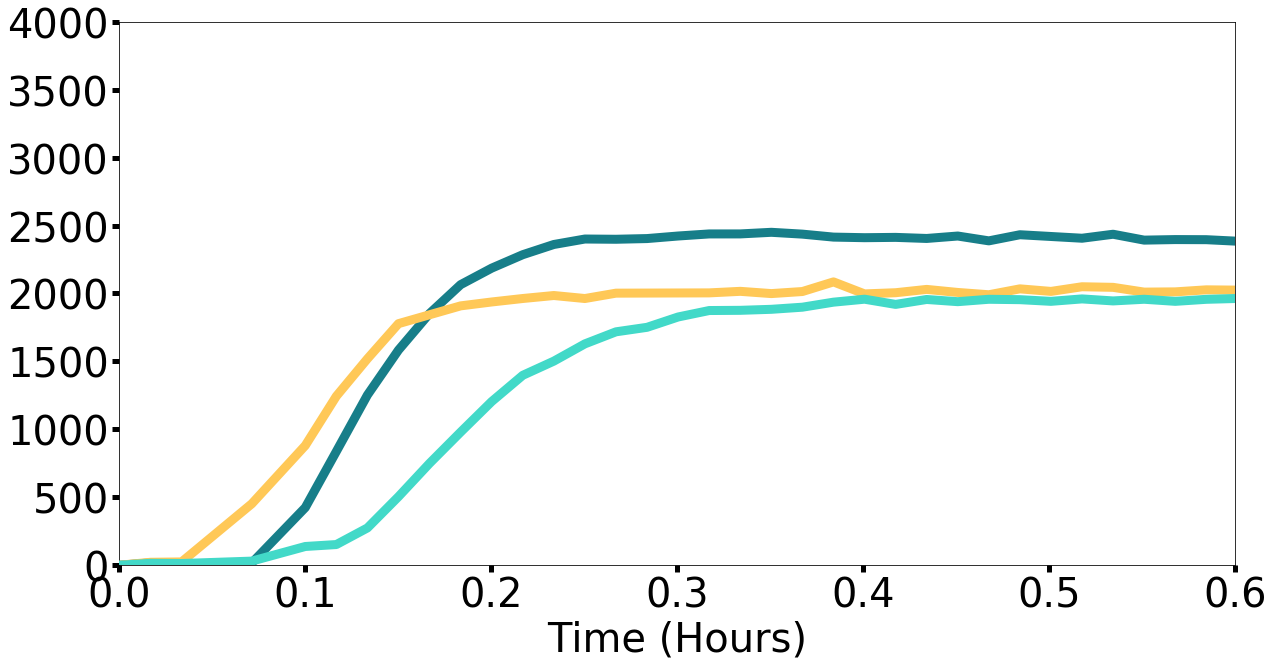

In [91]:
my_colors = ['#177e89','#ffc857','#42d9c8']
z_orders = [10,2,1]
ax = smooth_df.plot(x = "time", linestyle = '-', linewidth = 9, color = my_colors,figsize=(20, 10),fontsize = 40, zorder = z_orders)
#ax.set_ylim([0,10])
#ax.axis([0,4.0,0,10])


ax.axis([0,0.6,-0.5,4000])
plt.xlabel('Time (Hours)', fontsize = 40)
#plt.ylabel('nM', fontsize = 40)
#plt.xticks(np.arange(0, 2, 1.0))
ax.xaxis.set_tick_params(width=5, size = 7)
ax.yaxis.set_tick_params(width=5, size = 7)
#ax.axes.get_yaxis().set_ticks([])
ax.legend_.remove()
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='Input', loc='upper left')

In [88]:
#smooth_df.to_csv("ILN15gatecals.csv", sep=',')

In [89]:
steady_state = smooth_df[smooth_df['time']>0.4]

In [90]:
steady_state.mean()

ILN03    2424.328224
ILN04    2383.630171
ILN05    1999.261443
time        2.438399
dtype: float64

In [92]:
ILN03 = steady_state['ILN03'].mean()
ILN04 = steady_state['ILN04'].mean()
ILN05 = steady_state['ILN05'].mean()

In [93]:
means = [ILN03, ILN04, ILN05 + 200]

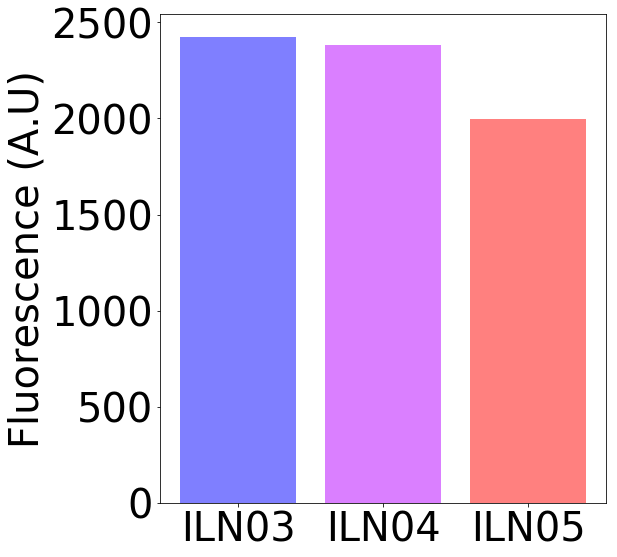

In [205]:
objects = ("ILN03", "ILN04","ILN05")
y_pos = np.arange(len(objects))
performance = [ILN03, ILN04, ILN05]
fig, ax = plt.subplots(figsize=(8, 9))
plt.bar(y_pos, performance, align='center', alpha=0.5, color=['#0001ff','#b700ff','#ff0200ff'], width=(y_pos[1]-y_pos[0])*0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Fluorescence (A.U)')
#plt.title('Stoichiometric Gate performance')
 
plt.show()

In [ ]:
[ILN03, ILN04, ILN05]

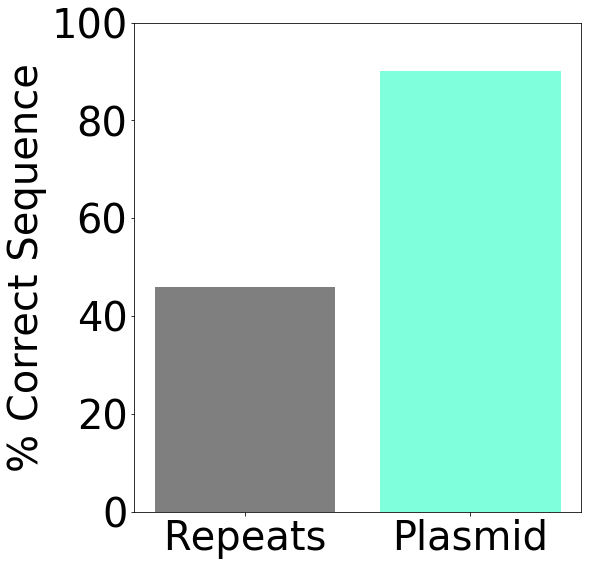

In [225]:
matplotlib.rcParams.update({'font.size': 40})
objects = ("Repeats", "Plasmid")
y_pos = np.arange(len(objects))
performance = [46, 90]
wi = 0.35
fig, ax = plt.subplots(figsize=(8, 9))
plt.bar(y_pos, performance, align='center', alpha=0.5, color=['black',"#00ffbb"], width=(y_pos[1]-y_pos[0])*0.8)
plt.xticks(y_pos, objects)
plt.ylabel('% Correct Sequence')
plt.ylim(0,100)

 
plt.show()